In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
file_path = '../data/preproc_train.csv'
df = pd.read_csv(file_path)
df.columns

Index(['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct',
       'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed',
       'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR',
       'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot',
       'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
       'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
       'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'default', 'asst_tot_quantile', 'asst_tot_quantile_probability',
       'liab_tot', 'financial_leverage', 'financial_leverage_quantile',
       'financial_leverage_quantile_probability', 'profitability_ratio',
       'profitability_ratio_quantile',
       'profitability_ratio_quantile_probability', 'net_income',
       'net_income_grow

In [7]:
df.columns[df.columns.str.contains('quantile')]

Index(['asst_tot_quantile', 'asst_tot_quantile_probability',
       'financial_leverage_quantile',
       'financial_leverage_quantile_probability',
       'profitability_ratio_quantile',
       'profitability_ratio_quantile_probability',
       'net_income_growth_quantile', 'net_income_growth_quantile_probability',
       'quick_ratio_v2_quantile', 'quick_ratio_v2_quantile_probability',
       'sales_growth_quantile', 'sales_growth_quantile_probability',
       'cash_assets_ratio_quantile', 'cash_assets_ratio_quantile_probability',
       'dscr_quantile', 'dscr_quantile_probability'],
      dtype='object')

In [17]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [423]:
def viz(cut_data, field, quantiles = 20):
    
    cut, bins = pd.qcut(cut_data, q=quantiles, labels=False, retbins=True, duplicates = 'drop')
    cut+=1# Adding 1 to make quantiles start from 1
    default_prob_values = df.groupby(cut)[['default']].mean()
    # print(bins)
    print(bins[-2],bins[-1])
    plt.figure(figsize=(8, 6))
    plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
    plt.title(f'Conditional Mean by {field}')
    plt.xlabel(field)
    plt.ylabel('Default Probability')
    plt.grid(True)
    plt.show()
    return bins

In [424]:
def generate_split_features(field, cut_point, bins = 45):
    print(df[field].describe())
    print(df[['id',field,'default']].sort_values(field).tail(10))
    print(df[['id',field,'default']].sort_values(field).head(10))

    print('Only those that defaulted:')
    print(df[df['default']==1][[field,'default']].sort_values(field).tail(10))
    
    print(field)
    sns.kdeplot(df[field])
    
    
    cut_data = df[df[field]>cut_point][field]
    first_bins = viz(cut_data, field, bins)

    
    cut_data = df[df[field]<=cut_point][field]
    second_bins = viz(cut_data, field, bins)

    return np.concatenate((first_bins, second_bins))


In [401]:
field = 'financial_leverage'

count   1023552.00
mean          0.68
std           0.35
min          -0.41
25%           0.49
50%           0.75
75%           0.91
max          97.08
Name: financial_leverage, dtype: float64
                id  financial_leverage  default
938314  8154400587               26.42        0
584109  2739510721               28.10        0
584110  2739510721               28.67        0
584112  2739510721               28.69        0
584111  2739510721               28.81        0
539928  2483570103               51.06        0
539929  2483570103               57.14        0
539930  2483570103               65.76        0
539931  2483570103               81.44        0
539932  2483570103               97.08        0
                  id  financial_leverage  default
781786    4391361211               -0.41        0
935574    8049760583               -0.41        0
935573    8049760583               -0.39        0
935575    8049760583               -0.38        0
935572    8049760583         

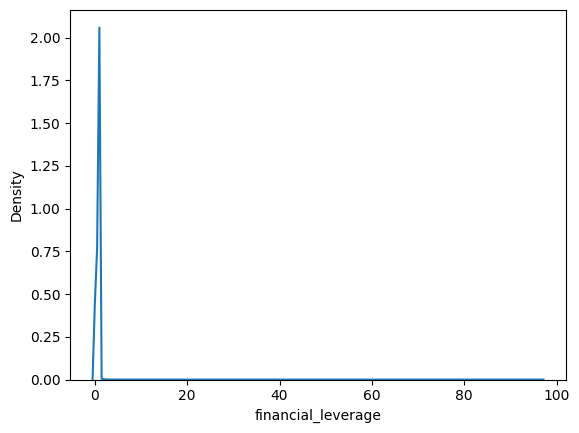

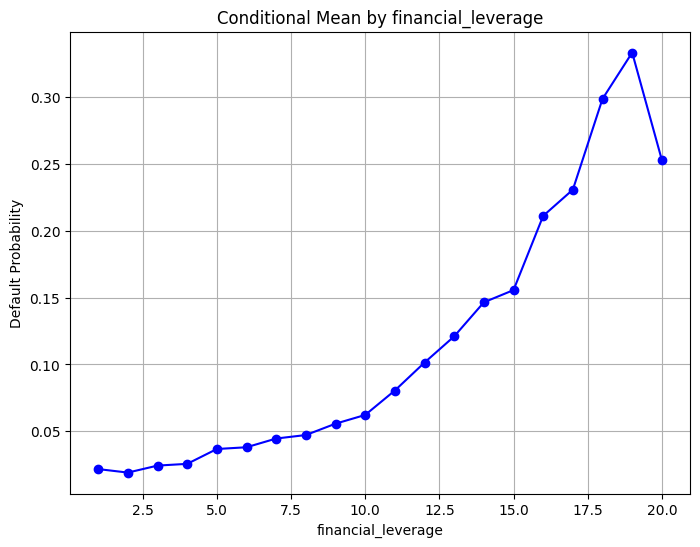

0.9861222481310818 1.0


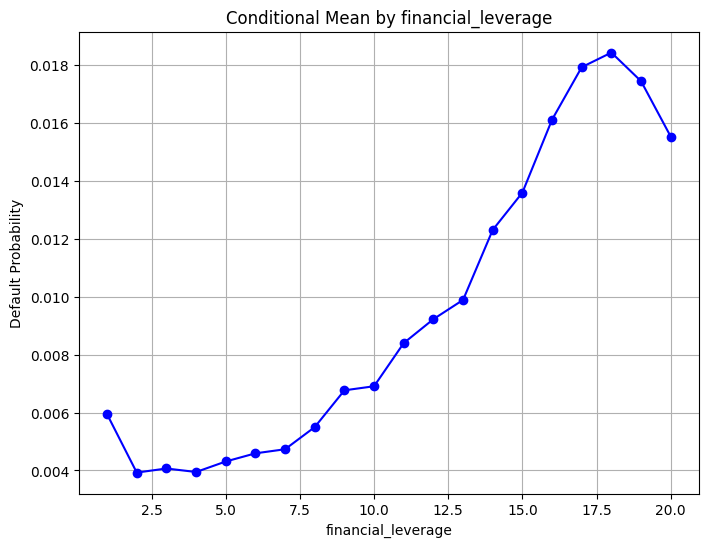

In [402]:
field = 'financial_leverage'
bins = generate_split_features(field, 1)

In [403]:
custom_bins = sorted(bins)

In [404]:
field = 'financial_leverage'

1.0079852277977512 97.07777557416392


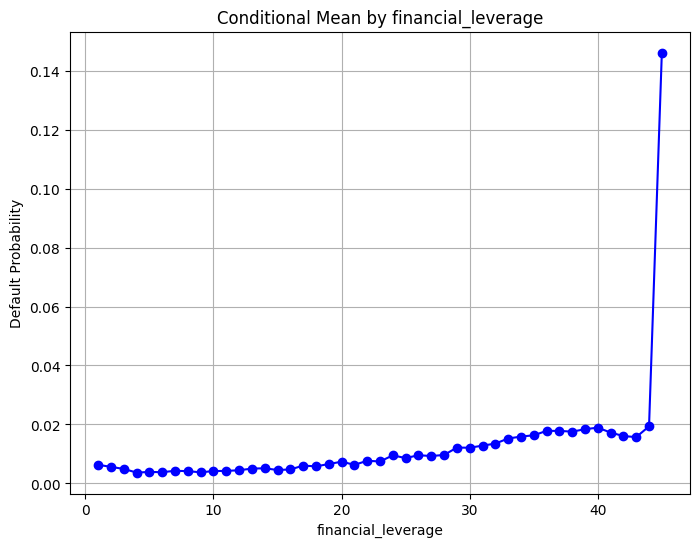

In [405]:
cut, bins = pd.qcut(df[field], q=45, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

1.0079852277977512 97.07777557416392


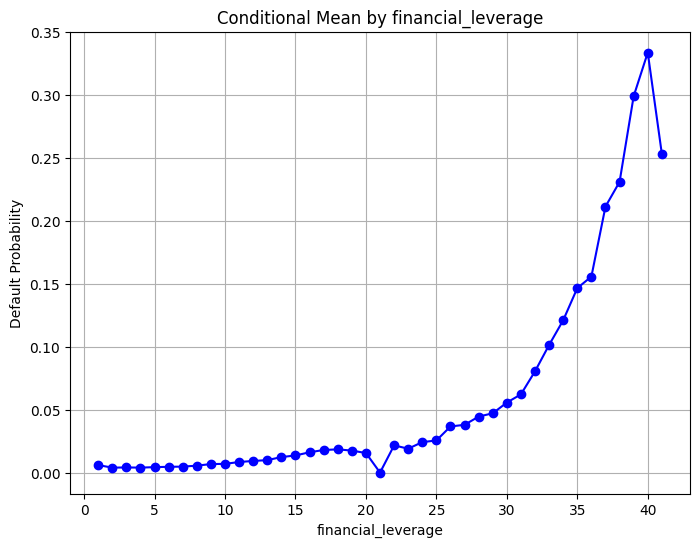

In [406]:
cut = pd.cut(df[field],bins=custom_bins, labels=False)
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

<Axes: ylabel='Density'>

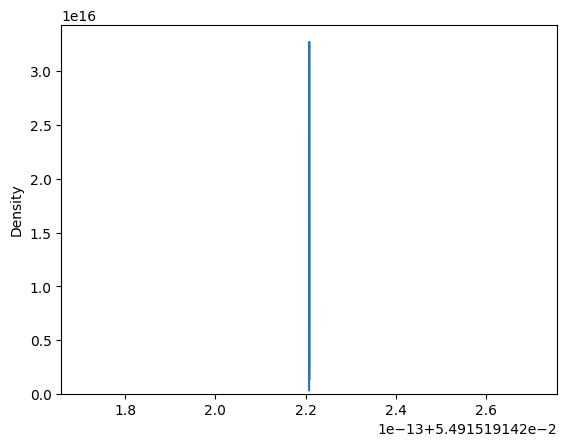

In [72]:
sns.kdeplot(profi_ratio_boxcox)

count   1023552.00
mean          0.01
std           0.13
min         -41.42
25%          -0.01
50%           0.00
75%           0.02
max           7.94
Name: profitability_ratio, dtype: float64
                  id  profitability_ratio  default
820376    5074410480                 1.28        0
718638    3669010104                 1.38        0
918166    7444571009                 1.45        0
862156    5874100968                 1.52        0
38119      204140719                 1.66        0
113864     620130377                 2.33        0
642546    3135330177                 2.88        0
1015141  13283740150                 3.59        0
567773    2637090966                 5.04        0
353380    1713850152                 7.94        0
                id  profitability_ratio  default
862178  5874340960               -41.42        1
772082  4231760960               -23.33        0
880137  6278030488               -18.39        0
765765  4150500967               -15.89        0


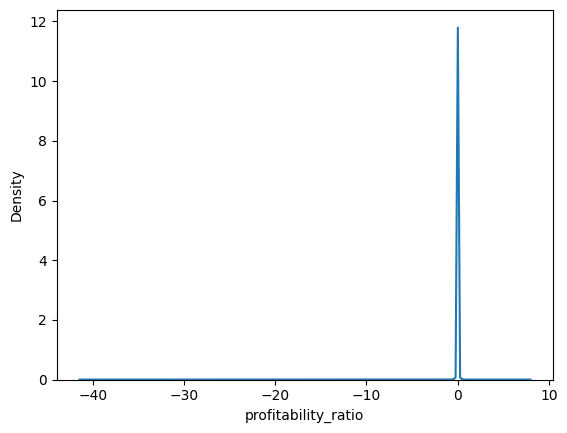

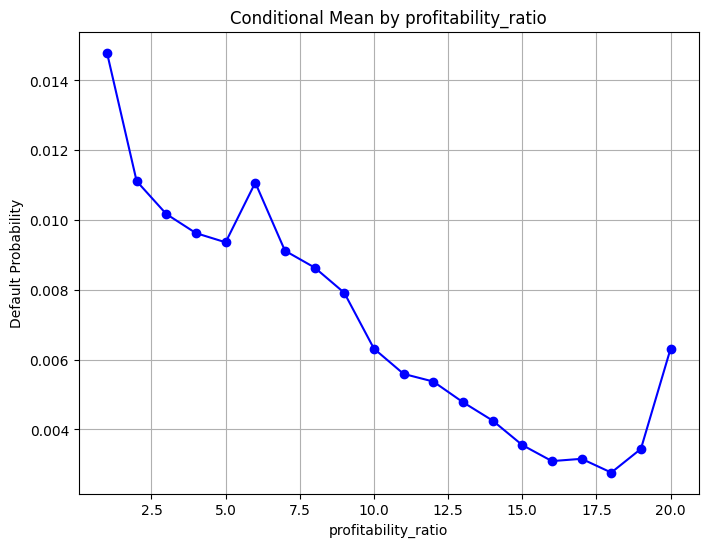

-0.03207380446295474 -0.0300004035443676


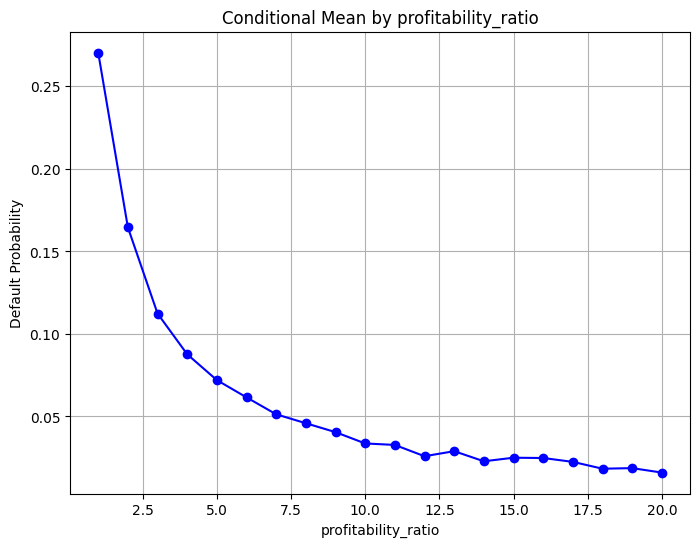

In [429]:
field = 'profitability_ratio'
profitability_ratio_bins = generate_split_features(field, -0.03, bins=20)
profitability_ratio_bins = sorted(profitability_ratio_bins)

In [430]:
field = 'profitability_ratio'

In [441]:
df['def_date'].dropna()

16         2013-07-17
17         2013-07-17
18         2013-07-17
19         2013-07-17
66         2009-07-02
              ...    
1023218    2013-01-14
1023219    2013-01-14
1023220    2013-01-14
1023328    2011-09-20
1023329    2011-09-20
Name: def_date, Length: 55424, dtype: object

0.161220802550527 7.936416843027074


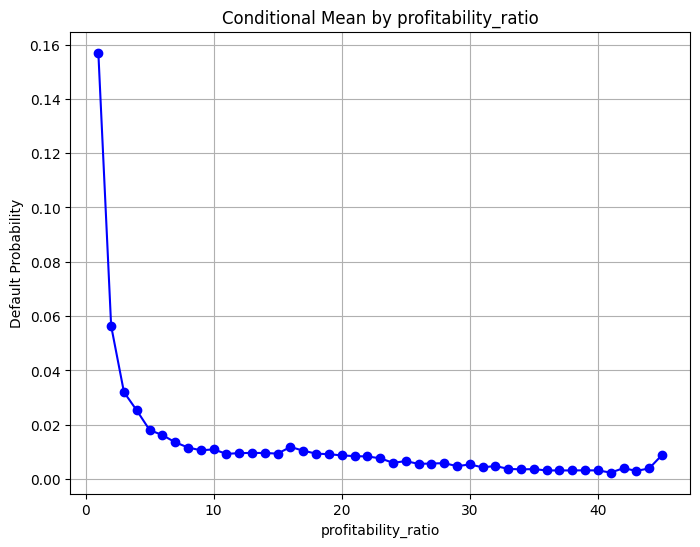

In [433]:
cut, bins = pd.qcut(df[field], q=45, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

0.161220802550527 7.936416843027074


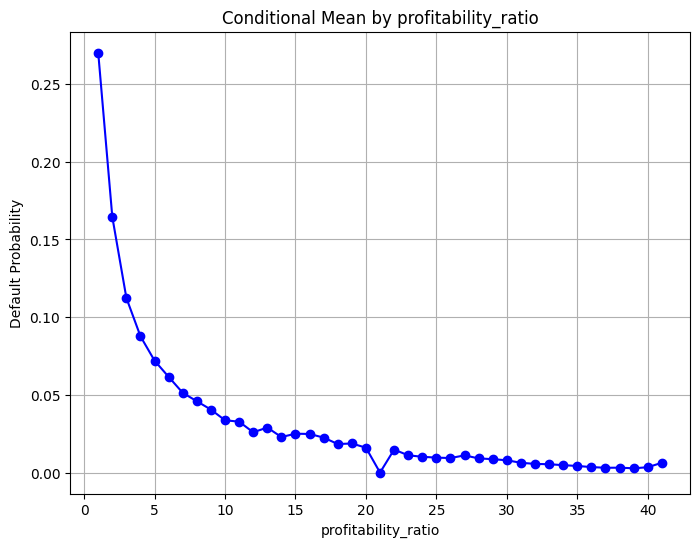

In [434]:
cut = pd.cut(df[field],bins=profitability_ratio_bins, labels=False)
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()
# print(bins)
print(bins[-2],bins[-1])
plt.figure(figsize=(8, 6))
plt.plot(default_prob_values.index, default_prob_values.default, marker='o', linestyle='-', color='b')
plt.title(f'Conditional Mean by {field}')
plt.xlabel(field)
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

0.1701710056660321 7.936416843027074


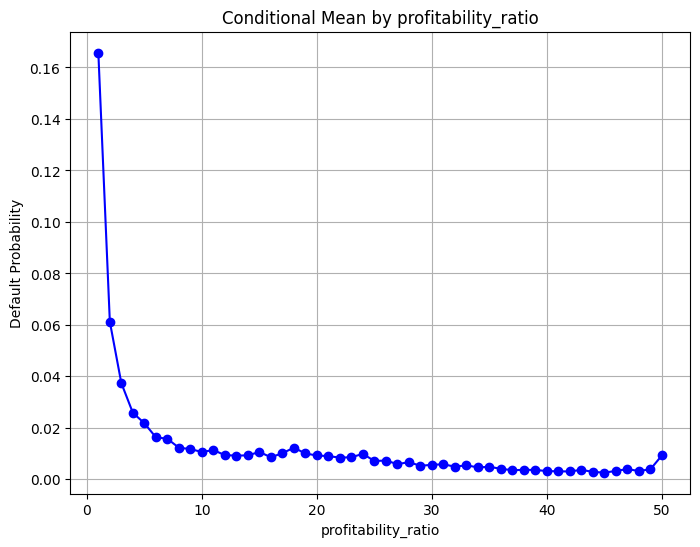

In [248]:
viz(df[field], field,50)

In [ ]:
### try running box cox transform before quantiles
### KDE on quantiles
###

In [257]:
from sklearn.neighbors import KernelDensity

In [267]:
default_prob_values

,default
profitability_ratio,
1.00,0.30
2.00,0.27
3.00,0.20
4.00,0.18
5.00,0.16
...,...
96.00,0.01
97.00,0.01
98.00,0.01


In [261]:
# default_prob_values

In [258]:
kde = KernelDensity(kernel='tophat', bandwidth=0.5)

array([0.30321665, 0.27105014, 0.20444865, 0.17928098, 0.15617605,
       0.12677389, 0.1097965 , 0.10217597, 0.09465215, 0.08183538,
       0.08282063, 0.07095553, 0.06575213, 0.06767629, 0.06054872,
       0.05205868, 0.05014191, 0.05773781, 0.04683065, 0.04022717,
       0.0487228 , 0.04353999, 0.03784295, 0.04353999, 0.03358562,
       0.02932829, 0.03360151, 0.02790918, 0.03549456, 0.02412488,
       0.0265026 , 0.02459792, 0.03076195, 0.03216651, 0.02366304,
       0.02317881, 0.02224326, 0.02601703, 0.02223273, 0.03028869,
       0.02034059, 0.02555608, 0.02223273, 0.02082347, 0.02743614,
       0.01751065, 0.0179754 , 0.01893043, 0.01844844, 0.01750237,
       0.01609087, 0.01371807, 0.01703739, 0.01324503, 0.01940369,
       0.01702933, 0.01135826, 0.01844844, 0.01609087, 0.0179754 ,
       0.01845717, 0.01513718, 0.01371807, 0.01419782, 0.01371807,
       0.0132513 , 0.01655629, 0.01845717, 0.01371807, 0.01183152,
       0.01844844, 0.01230478, 0.00993377, 0.00709891, 0.01277

In [288]:
kde.fit(default_prob_values['default'].values.reshape(-1,1))

KernelDensity(bandwidth=0.5, kernel='tophat')

In [295]:
from scipy.stats import gaussian_kde

In [325]:
cut_data = df[field]

cut, bins = pd.qcut(cut_data, q=100, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()

In [326]:
test_df = df[[field,'default']]
test_df['default_prob_value'] = cut.to_frame().join(default_prob_values, how='left',on= field)['default']

,profitability_ratio,default,default_prob_value
0,0.02,0,0.00
1,-0.05,0,0.03
2,-0.04,0,0.02
3,-0.04,0,0.02
4,-0.04,0,0.02
...,...,...,...
1023547,0.00,0,0.01
1023548,0.00,0,0.01
1023549,-0.08,0,0.04
1023550,0.00,0,0.01


In [338]:
cut_data = df[(df[field]<-.01)][field]

cut, bins = pd.qcut(cut_data, q=10, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)[['default']].mean()

In [339]:
default_prob_values

,default
profitability_ratio,
1.00,0.16
2.00,0.06
3.00,0.04
4.00,0.03
5.00,0.02
6.00,0.02
7.00,0.01
8.00,0.01
9.00,0.01


In [355]:
from statsmodels.nonparametric.kernel_regression import KernelReg


In [360]:
# quantile_centers

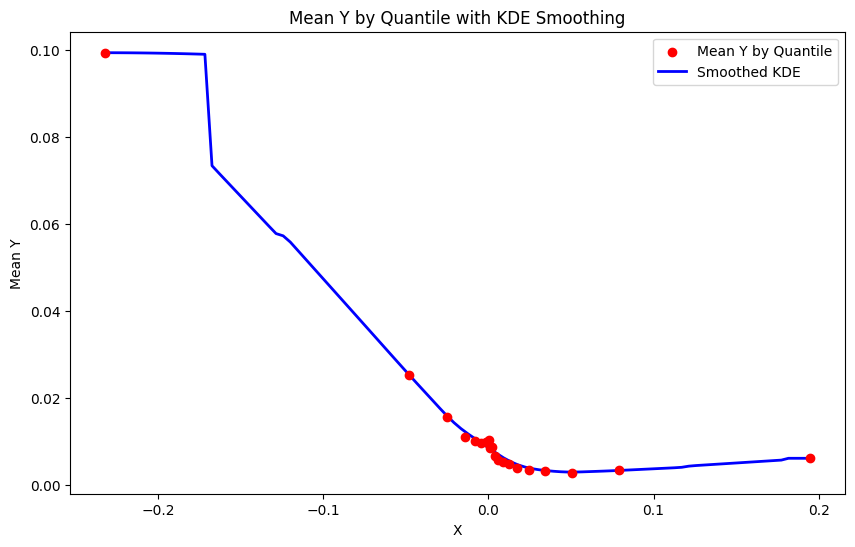

In [367]:
cut_data = df[field]

cut, bins = pd.qcut(cut_data, q=20, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)['default'].mean().values
quantile_centers = df.groupby(cut)[field].mean().values


# Step 3: Apply KDE for smoothing
kreg = KernelReg(endog=default_prob_values, exog=quantile_centers, var_type='c', reg_type='ll', ckertype='gaussian')

smoothed_x = np.linspace(quantile_centers.min(), quantile_centers.max(), 100)
smoothed_y, _ = kreg.fit(smoothed_x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(quantile_centers, default_prob_values, color='red', label='Mean Y by Quantile', zorder=5)
plt.plot(smoothed_x, smoothed_y, label='Smoothed KDE', color='blue', linewidth=2)



plt.xlabel('X')
plt.ylabel('Mean Y')
plt.legend()
plt.title("Mean Y by Quantile with KDE Smoothing")
plt.show()


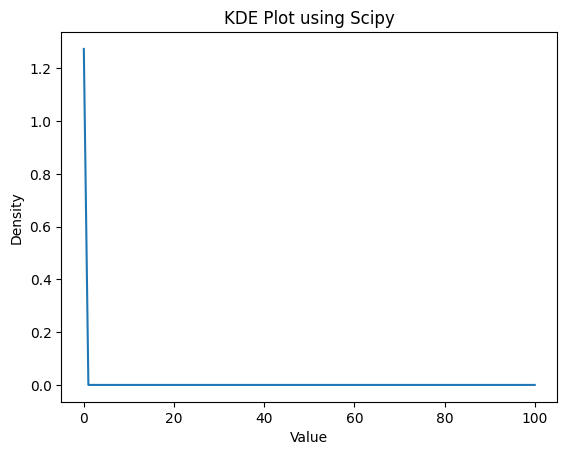

In [343]:
cut_data = df[(df[field]<-.01)][field]

cut, bins = pd.qcut(cut_data, q=100, labels=False, retbins=True, duplicates = 'drop')
cut+=1# Adding 1 to make quantiles start from 1
default_prob_values = df.groupby(cut)['default'].mean().values
quantile_centers = df.groupby(cut)[field].mean().values

kde = gaussian_kde(quantile_centers, weights=default_prob_values)
x_smooth = np.linspace(df[field].min(), df[field].max(), 1000)
x_smooth = np.linspace(0,100, 100)
y_smooth = kde(x_smooth)

# Plotting
plt.plot(x_smooth, y_smooth)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("KDE Plot using Scipy")
plt.show()

In [341]:
kde(-1.5)

array([0.16240775])

array([0.30321665, 0.27105014, 0.20444865, 0.17928098, 0.15617605,
       0.12677389, 0.1097965 , 0.10217597, 0.09465215, 0.08183538,
       0.08282063, 0.07095553, 0.06575213, 0.06767629, 0.06054872,
       0.05205868, 0.05014191, 0.05773781, 0.04683065, 0.04022717,
       0.0487228 , 0.04353999, 0.03784295, 0.04353999, 0.03358562,
       0.02932829, 0.03360151, 0.02790918, 0.03549456, 0.02412488,
       0.0265026 , 0.02459792, 0.03076195, 0.03216651, 0.02366304,
       0.02317881, 0.02224326, 0.02601703, 0.02223273, 0.03028869,
       0.02034059, 0.02555608, 0.02223273, 0.02082347, 0.02743614,
       0.01751065, 0.0179754 , 0.01893043, 0.01844844, 0.01750237,
       0.01609087, 0.01371807, 0.01703739, 0.01324503, 0.01940369,
       0.01702933, 0.01135826, 0.01844844, 0.01609087, 0.0179754 ,
       0.01845717, 0.01513718, 0.01371807, 0.01419782, 0.01371807,
       0.0132513 , 0.01655629, 0.01845717, 0.01371807, 0.01183152,
       0.01844844, 0.01230478, 0.00993377, 0.00709891, 0.01277

In [309]:
df.groupby(cut)[field].mean()

profitability_ratio
1.00     -1.51
2.00     -0.61
3.00     -0.43
4.00     -0.34
5.00     -0.28
          ... 
96.00    -0.01
97.00    -0.01
98.00    -0.01
99.00    -0.01
100.00   -0.01
Name: profitability_ratio, Length: 100, dtype: float64